In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1,inplace=True)
df


,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [4]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
Fare,0


<Axes: ylabel='Frequency'>

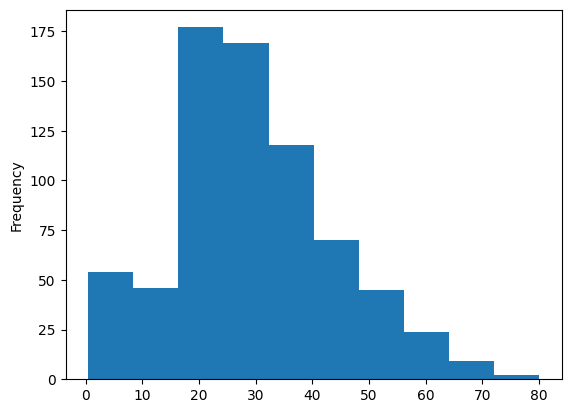

In [5]:
import matplotlib.pyplot as plt
df.Age.plot(kind='hist')


In [6]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
Fare,0


In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500
...,...,...,...,...,...
886,0,2,1,27.0,13.0000
887,1,1,0,19.0,30.0000
888,0,3,0,28.0,23.4500
889,1,1,1,26.0,30.0000


In [8]:
X=df.drop('Survived',axis=1)
y=df['Survived']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8156424581005587

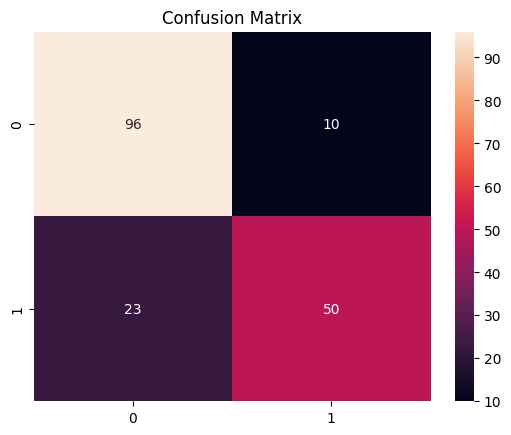

In [11]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
import seaborn as sns
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
sns.heatmap(cm,annot=True)
plt.show()

In [16]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)
y_pred=model.predict(X_test)
model.score(X_test,y_test)

0.8491620111731844

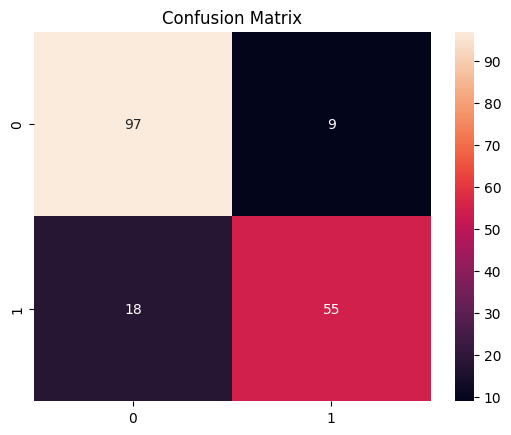

In [17]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
dm=confusion_matrix(y_test,y_pred)
import seaborn as sns
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
sns.heatmap(dm,annot=True)
plt.show()


In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.8491620111731844

In [20]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)
model.score(X_test,y_test)
y_pred=model.predict(X_test)
model.score(X_test,y_test)

0.8324022346368715

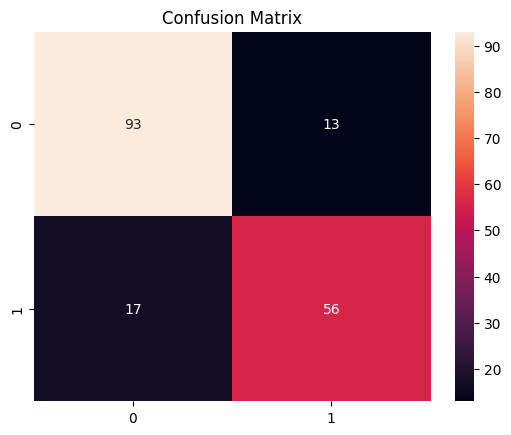

In [21]:
sm=confusion_matrix(y_test,y_pred)
import seaborn as sns
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
sns.heatmap(sm,annot=True)
plt.show()
#

In [22]:
X_test

,Pclass,Sex,Age,Fare
481,2,1,28.00,0.0000
233,3,0,5.00,31.3875
217,2,1,42.00,27.0000
280,3,1,65.00,7.7500
629,3,1,28.00,7.7333
...,...,...,...,...
431,3,0,28.00,16.1000
305,1,1,0.92,151.5500
3,1,0,35.00,53.1000
384,3,1,28.00,7.8958


In [23]:
model.predict([[2,1,28,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0])

In [24]:
y_test

,Survived
481,0
233,1
217,0
280,0
629,0
...,...
431,1
305,1
3,1
384,0


Logistic regression gives better accuracy than decision tree as target variable is binary type.Logistic regression performs better when it's come to the case of target variable is of type binary type
